In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [1]:
import numpy as np

import cupy as cp

import time

In [2]:
cp.cuda.Device(), cp.cuda.Device().mem_info

(<CUDA Device 0>, (5104271360, 6222970880))

In [25]:
def stopwatch(func, *kargs):
    start = time.time()
    func(*kargs)
    end = time.time()

In [26]:
def test1():
    print("test")

In [27]:
start = time.time()

x_cpu = np.array([1, 2, 3])

l2_cpu = np.linalg.norm(x_cpu)

end = time.time() - start
print(end)

0.00051116943359375


In [28]:
#Using CuPy, we can perform the same calculations on GPU in a similar way:

start = time.time()

x_gpu = cp.array([1, 2, 3])

l2_gpu = cp.linalg.norm(x_gpu)

end = time.time() - start
print(end)

0.007453203201293945


In [29]:
cp.cuda.Device(), cp.cuda.Device().mem_info

(<CUDA Device 0>, (5351342080, 6222970880))

In [30]:
MAX_NUMBER = 100000

In [31]:
start = time.time()

x_cpu = np.array([i for i in range(MAX_NUMBER)])

l2_cpu = np.linalg.norm(x_cpu)

end = time.time() - start
print(end)

0.034442901611328125


In [32]:
#Using CuPy, we can perform the same calculations on GPU in a similar way:

start = time.time()

x_gpu = cp.array([i for i in range(MAX_NUMBER)])

l2_gpu = cp.linalg.norm(x_gpu)

end = time.time() - start
print(end)

0.010156631469726562


In [35]:
def benchmark(max_number, increment=10, verbose=False):
    report = []
    for j in range(0, max_number, increment):
        start = time.time()

        x_cpu = np.array([i for i in range(j)])

        l2_cpu = np.linalg.norm(x_cpu)

        end1 = time.time() - start
        

        #Using CuPy, we can perform the same calculations on GPU in a similar way:

        start = time.time()

        x_gpu = cp.array([i for i in range(j)])

        l2_gpu = cp.linalg.norm(x_gpu)

        end2 = time.time() - start
        if isVerbose:
            print(j, end1, end2)
        
        report.append([j, end1, end2])
    return report

In [52]:
report = benchmark(100000, 100)

0 4.1484832763671875e-05 0.00031065940856933594
100 5.0067901611328125e-05 0.00021791458129882812
200 8.606910705566406e-05 0.0008029937744140625
300 7.653236389160156e-05 0.00038123130798339844
400 6.461143493652344e-05 0.00043201446533203125
500 7.43865966796875e-05 0.000438690185546875
600 9.775161743164062e-05 0.00040411949157714844
700 9.512901306152344e-05 0.00046324729919433594
800 0.00010371208190917969 0.00047135353088378906
900 0.00011348724365234375 0.0004150867462158203
1000 0.00012230873107910156 0.00027251243591308594
1100 0.00012922286987304688 0.00025463104248046875
1200 0.0001373291015625 0.0006604194641113281
1300 0.000148773193359375 0.0005116462707519531
1400 0.0002853870391845703 0.00030493736267089844
1500 0.00016736984252929688 0.0008091926574707031
1600 0.0001766681671142578 0.0005335807800292969
1700 0.00018596649169921875 0.0004985332489013672
1800 0.00019288063049316406 0.0005159378051757812
1900 0.0003943443298339844 0.0003230571746826172
2000 0.000388622283

In [53]:
len(report)

1000

In [54]:
import pandas as pd

In [55]:
df = pd.DataFrame(report,columns=["Elements", "Numpy", "CuPy"])

In [56]:
import matplotlib.pyplot as plt 
%matplotlib inline

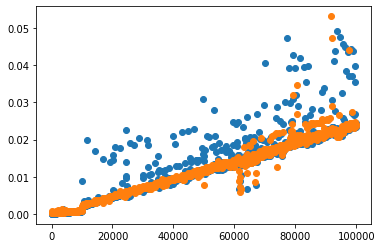

In [57]:
plt.scatter(df["Elements"], df["Numpy"])
plt.scatter(df["Elements"], df["CuPy"])
plt.show()

In [58]:
import plotly

ModuleNotFoundError: No module named 'plotly'

In [59]:
pip install plotly

     |████████████████████████████████| 26.5 MB 29.6 MB/s eta 0:00:01     |██████████████████████████▋     | 22.0 MB 29.6 MB/s eta 0:00:01
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


In [61]:
import plotly.graph_objects.Figure

ModuleNotFoundError: No module named 'plotly.graph_objects.Figure'